# Titanic

The dataset contains details of the passengers of the ship Titanic that sank after colliding with an iceberg in 1912.<br>
The EDA focuses on the passengers who survived and who did not, and shows the survival rate corresponding to passenger class, age and gender.
Several machine learning models have been trained and tested on this data to predict the survival rate of a passenger based on the features.<br>
Data source: <a href='https://www.kaggle.com/datasets/mahmoudshogaa/titanic-dataset'>Titanic dataset</a>

In [56]:
# Importing libraries

# For Data Manipulation
import pandas as pd
import numpy as np

# For Data Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# For Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Setting plot style
sns.set_style('darkgrid')

In [57]:
# Reading data into a dataframe named 'titanic'
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
# Checking the shape of the dataframe
titanic.shape

(891, 12)

In [59]:
# Getting the basic info
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Preprocessing

In [60]:
# Checking null values per column
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [61]:
# Plotting 'Age' VS 'Pclass'
fig = px.box(data_frame= titanic, x="Pclass", y="Age", labels={'Pclass':'Passenger Class'}, title= 'Age Vs Passenger Class',
            color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_layout(height = 550)
fig.show()

The median value of age for the classes 1, 2 and 3 are 37, 29 and 24 respectively. Using these values to fill the null values in 'Age' column.

In [62]:
'''
Description: For null values of 'Age', returns the average age with respect to 'Pclass'
Input: Columns of the dataframe
Output: Integer
'''

def compute_age(columns):
    Age = columns[0]
    Pclass = columns[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [63]:
# Applying the function compute_age to fill null values in 'Age' column
titanic['Age'] = titanic[['Age', 'Pclass']].apply(compute_age, axis=1)

In [64]:
# Checking null values per column
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [65]:
# Dropping the column 'Cabin'
titanic.drop('Cabin', axis=1, inplace=True)

# Dropping other null values
titanic.dropna(inplace=True)

In [66]:
# Checking null values per column
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [67]:
# c1 contains number of rows in the dataframe
c1 = len(titanic)

# Dropping duplicate rows
titanic.drop_duplicates(inplace= True)

# c2 contains number of unique rows in the dataframe
c2 = len(titanic)

print(f'{c1-c2} duplicate rows removed')

0 duplicate rows removed


In [68]:
# Checking first 5 rows
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# EDA

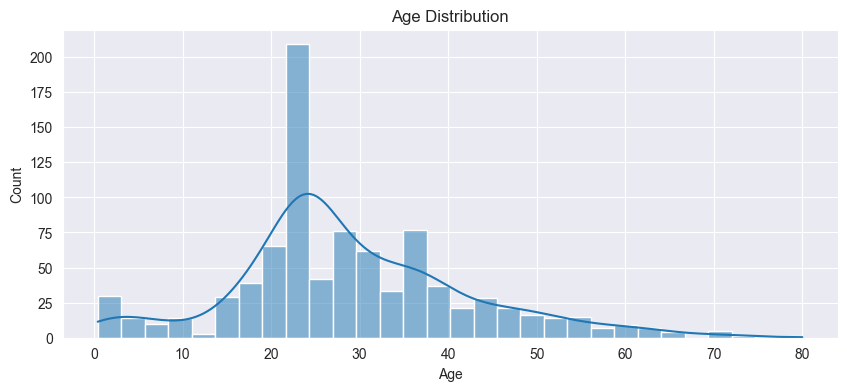

In [69]:
# Plotting age distribution of the passengers
plt.figure(figsize=(10,4))
sns.histplot(data= titanic, x = 'Age', bins = 30, kde = True)
plt.title('Age Distribution')
plt.show()

Most of the passengers were of age 20-40 years.

In [70]:
# Plotting the number of survived passengers of each class
fig = px.histogram(data_frame= titanic, x="Survived", color='Pclass', text_auto=True, title= 'Survived Passengers per Class', 
                    color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_layout(bargap=0.05, autosize = False, height = 550)
fig.show()

Passengers who survived were mostly from the Class 1. The count was 134. <br>
Among the 549 passengers who did not survive, 372 were from Class 3. The rest were from Class 1 & 2.

In [71]:
# Plotting the number of survived passengers of each gender
fig = px.histogram(data_frame= titanic, x="Survived", color="Sex", text_auto= True, title= 'Survived Passengers per Gender',
                   color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_layout(bargap=0.05, height = 550, autosize = False)
fig.show()

Among the survived passengers, 231 were female and 109 were male.<br>
Among the passengers who could not survive, 468 were male and 81 were female.

In [72]:
# Plotting the number of survived passengers of each class, age and gender
fig = px.histogram(data_frame= titanic, x="Age", color='Survived', nbins = 50, pattern_shape= 'Sex', title= 'Survived Passengers per Age, Class and Gender', 
                    color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_layout(bargap=0.05, autosize = True, height = 650, width = 1400)
fig.show()

In the figure, it can be seen that, passengers from the age group 24-26 shows the most survival rate. <br>
55 passengers from this age group survived, among them, 41 were female and 14 male. Among the 135 passengers, who could not survive, 113 were male and 22 female.

In [73]:
# Plotting the fare distribution
fig = px.histogram(data_frame= titanic, x="Fare", nbins=30, text_auto=True, title = 'Ticket Fare Distribution', 
                   color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_layout(bargap=0.05, autosize = True)
fig.show()

336 passengers did not book a ticket.<br>
315 passengers bought the cheapest ticket.<br>
The rest were from Class 1 & 2.

In [74]:
# Plotting the number of siblings/spouse of the passengers
fig = px.histogram(data_frame= titanic, x="SibSp", text_auto= True, labels={'SibSp': 'Siblings / Spouse'}, title = 'Number of Siblings / Spouse',
                   color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_layout(bargap=0.05, autosize = False)
fig.show()

606 passengers boarded alone. <br>
209 passengers had 1 person accompanying them, probably their spouse.<br>
Rest of the passengers were accompanied buy both their siblings and spouses probably.

# Machine Learning

Training and testing classification models to predict whether a passenger survived or not.<br><br>
Preprocessing Stage

In [75]:
# Converting male to 1, female to 0 and storing in a dataframe named 'sex'
sex = pd.get_dummies(data=titanic['Sex'], drop_first=True, dtype=int)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [76]:
# Merging the dataframes 'titanic' and 'sex'
titanic = pd.concat([titanic, sex], axis=1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [77]:
# Droppping the columns not needed to train a model
titanic.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Embarked'], axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


c:\Users\Ankita\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



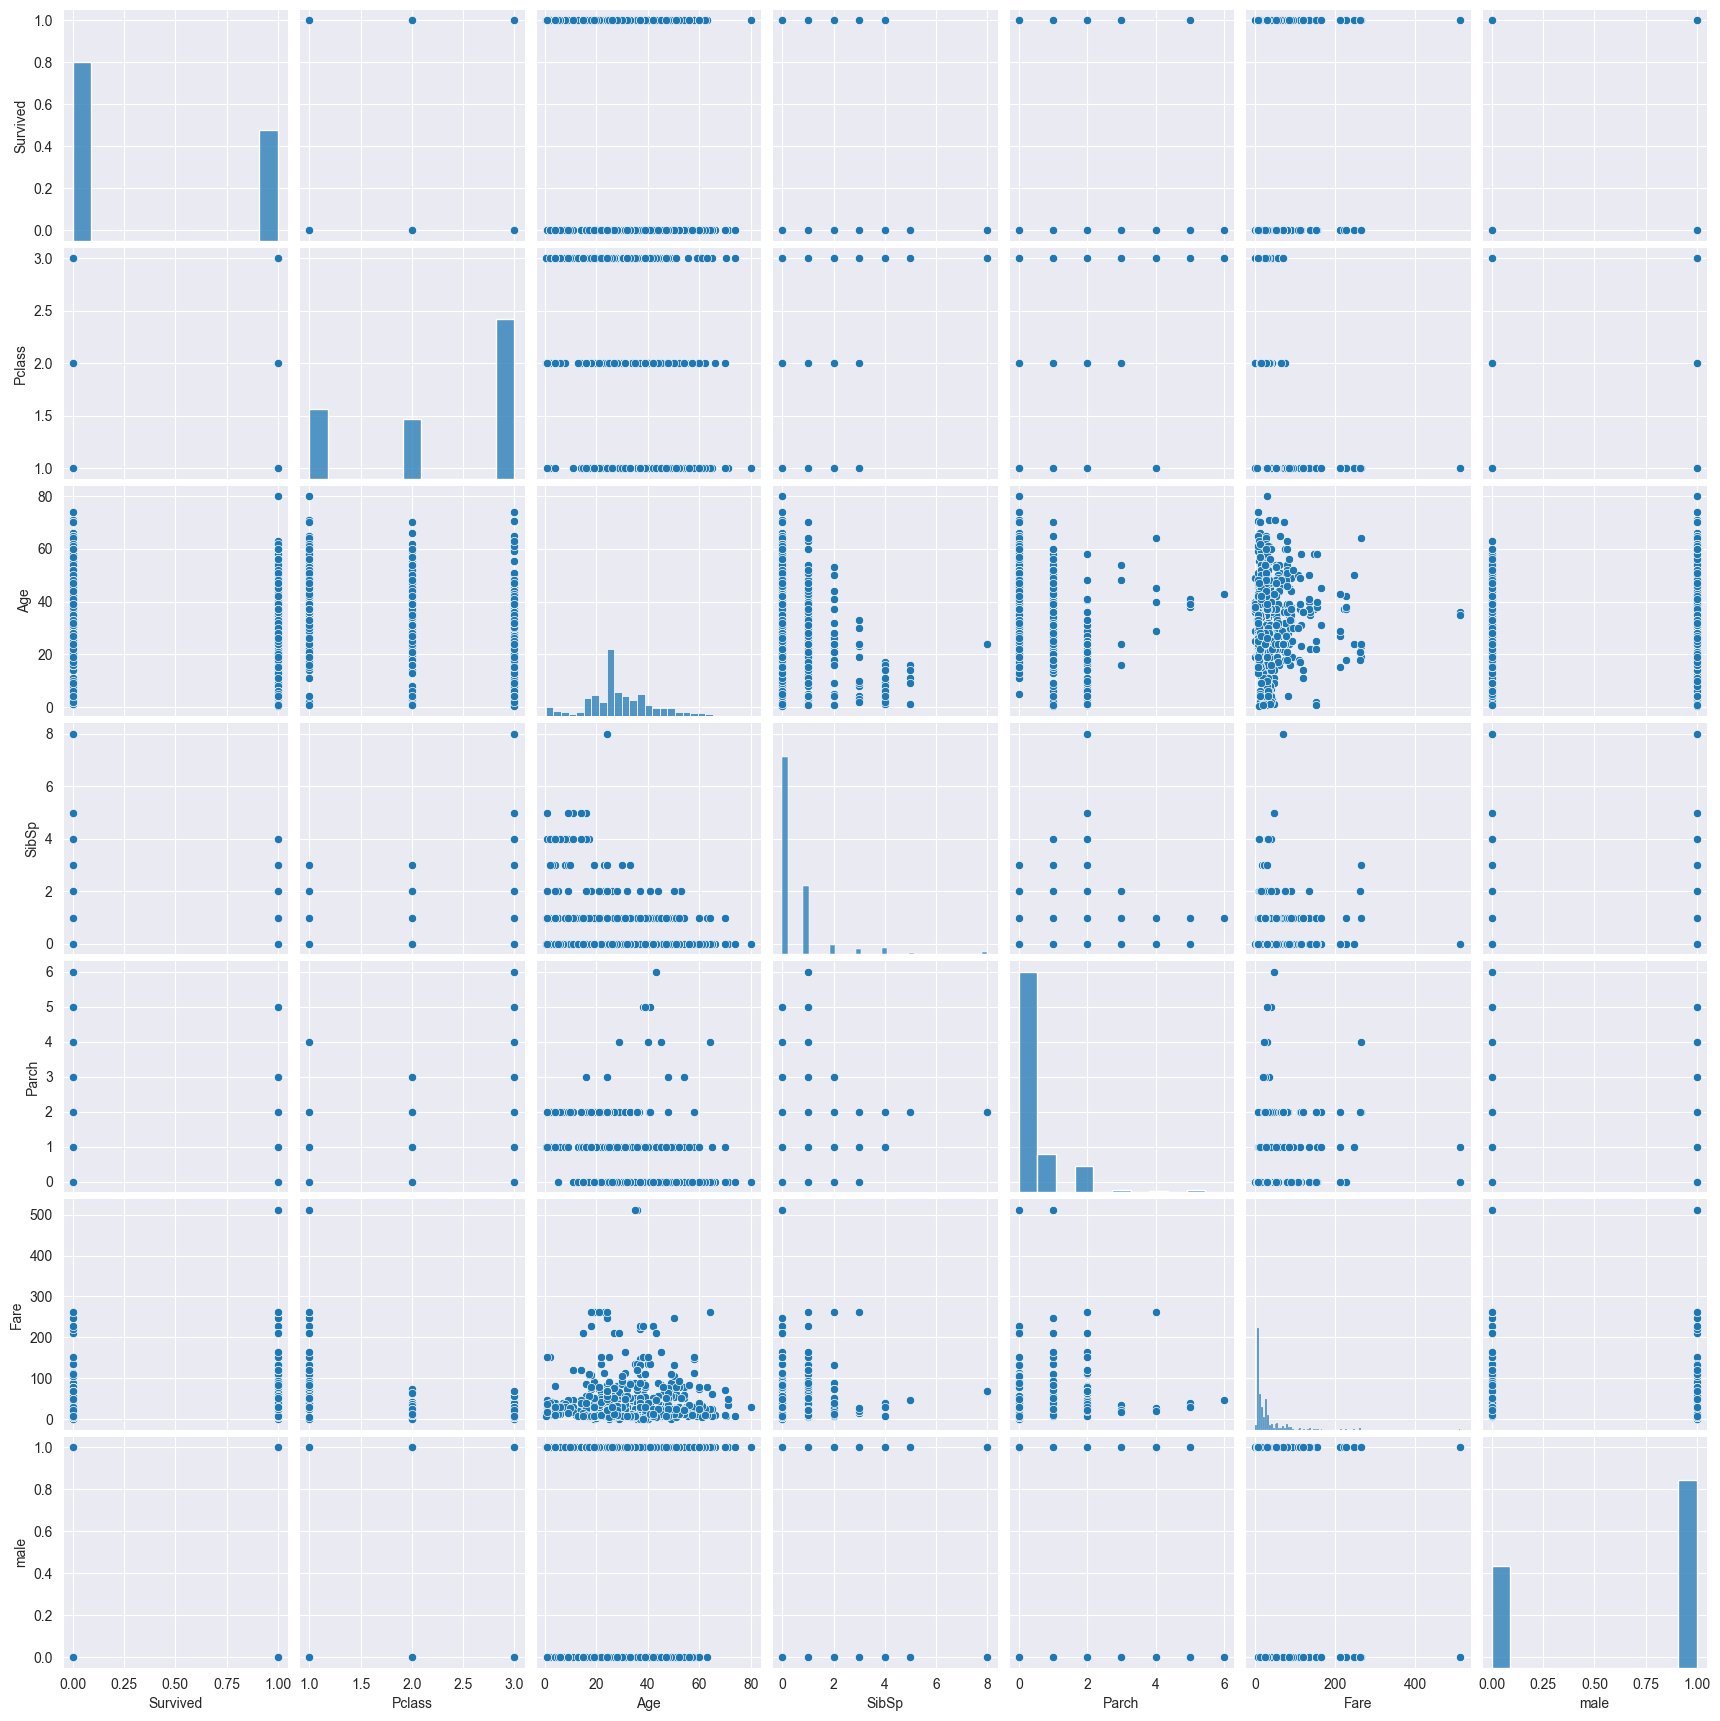

In [78]:
# Plot to see the relations between the columns
sns.pairplot(data= titanic)
plt.show()

In [79]:
# X contains the features
X = titanic.drop('Survived', axis = 1)

# y contains the feature to be predicted
y = titanic['Survived']

# Dividing into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=30)

Model training and testing

In [80]:
# Defining a dictionary containing some of the classification models
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=200)
}

Accuracy of Logistic Regression: 79.40074906367042

Confusion Matrix of Logistic Regression: 
[[143  19]
 [ 36  69]]

Classification Report of Logistic Regression:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       162
           1       0.78      0.66      0.72       105

    accuracy                           0.79       267
   macro avg       0.79      0.77      0.78       267
weighted avg       0.79      0.79      0.79       267




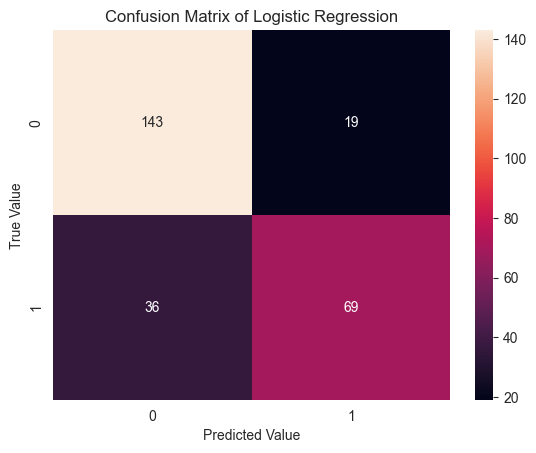

---------------------------------------------------------------------------------------
Accuracy of Support Vector Machine: 65.1685393258427

Confusion Matrix of Support Vector Machine: 
[[146  16]
 [ 77  28]]

Classification Report of Support Vector Machine:
               precision    recall  f1-score   support

           0       0.65      0.90      0.76       162
           1       0.64      0.27      0.38       105

    accuracy                           0.65       267
   macro avg       0.65      0.58      0.57       267
weighted avg       0.65      0.65      0.61       267




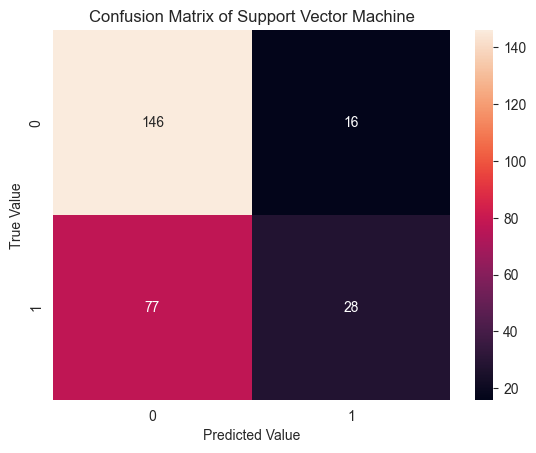

---------------------------------------------------------------------------------------
Accuracy of Decision Tree: 76.40449438202246

Confusion Matrix of Decision Tree: 
[[130  32]
 [ 31  74]]

Classification Report of Decision Tree:
               precision    recall  f1-score   support

           0       0.81      0.80      0.80       162
           1       0.70      0.70      0.70       105

    accuracy                           0.76       267
   macro avg       0.75      0.75      0.75       267
weighted avg       0.76      0.76      0.76       267




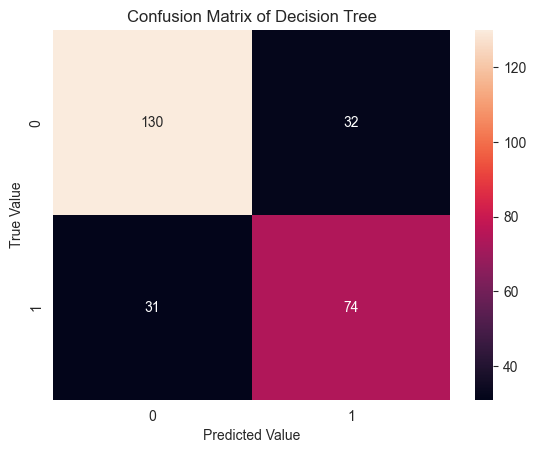

---------------------------------------------------------------------------------------
Accuracy of Random Forest: 81.64794007490637

Confusion Matrix of Random Forest: 
[[141  21]
 [ 28  77]]

Classification Report of Random Forest:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       162
           1       0.79      0.73      0.76       105

    accuracy                           0.82       267
   macro avg       0.81      0.80      0.81       267
weighted avg       0.82      0.82      0.82       267




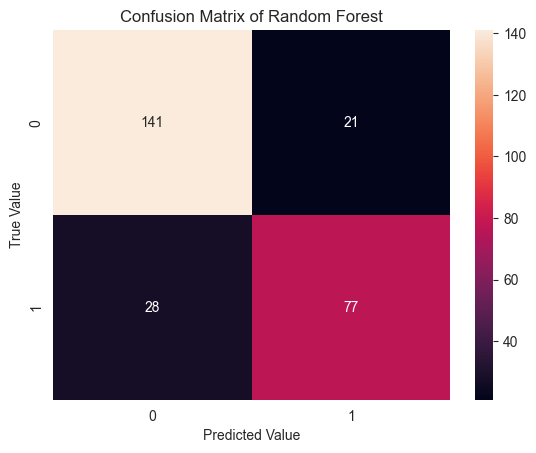

---------------------------------------------------------------------------------------


In [81]:
'''
Description: Fits the training data into each model from the dictionary 'models'
             Tests the model against the test data
             Prints the accuracy score, confusion matrix and classification report of each model
             Plots the confusion matrix
'''

for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    print(f'Accuracy of {model_name}: {accuracy_score(y_test, predictions)*100}\n')

    cm = confusion_matrix(y_test, predictions)
    print(f'Confusion Matrix of {model_name}: \n{cm}\n')
    print(f'Classification Report of {model_name}:\n {classification_report(y_test, predictions)}\n')

    sns.heatmap(cm, annot= True, fmt='d')
    plt.xlabel('Predicted Value')
    plt.ylabel('True Value')
    plt.title(f'Confusion Matrix of {model_name}')
    plt.show()
    print('---------------------------------------------------------------------------------------')


All the models show relatively good accuracy which depends on the random state parameter in train_test_split. <br>
Changing the random state will change the accuracy of each model and the model with the highest accuracy will be generally preferred.<br>
In this case, Random Forest classifier shows a better accuracy comparatively.